<a href="https://colab.research.google.com/github/dhanushpachabhatla/My_LangChain_Playground/blob/main/langchain_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langsmith --quiet

In [3]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.74
    Uninstalling langchain-core-0.3.74:
      Successfully uninstalled langchain-core-0.3.74
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [2]:
import os
from getpass import getpass

# must enter API key
os.environ["LANGCHAIN_API_KEY"] = getpass("Enter LangSmith API Key: ")

# below should not be changed
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# you can change this as preferred
os.environ["LANGCHAIN_PROJECT"] = "pr-husky-bran-20"

Enter LangSmith API Key: ··········


#Default Tracing

In [7]:
import os
from getpass import getpass
from langchain_google_genai import ChatGoogleGenerativeAI

os.environ['GOOGLE_API_KEY'] = getpass("Enter your GEMINI KEY")

llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash',temperature= 0.2)

Enter your GEMINI KEY··········


In [8]:
llm.invoke("hello")

AIMessage(content='Hello there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--d44d9573-a024-408c-95e8-4010a06fee5b-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

After this we should see that a new project `pr-husky-bran-20` has been created in the LangSmith UI. Inside that project, we should see the trace from our LLM call:

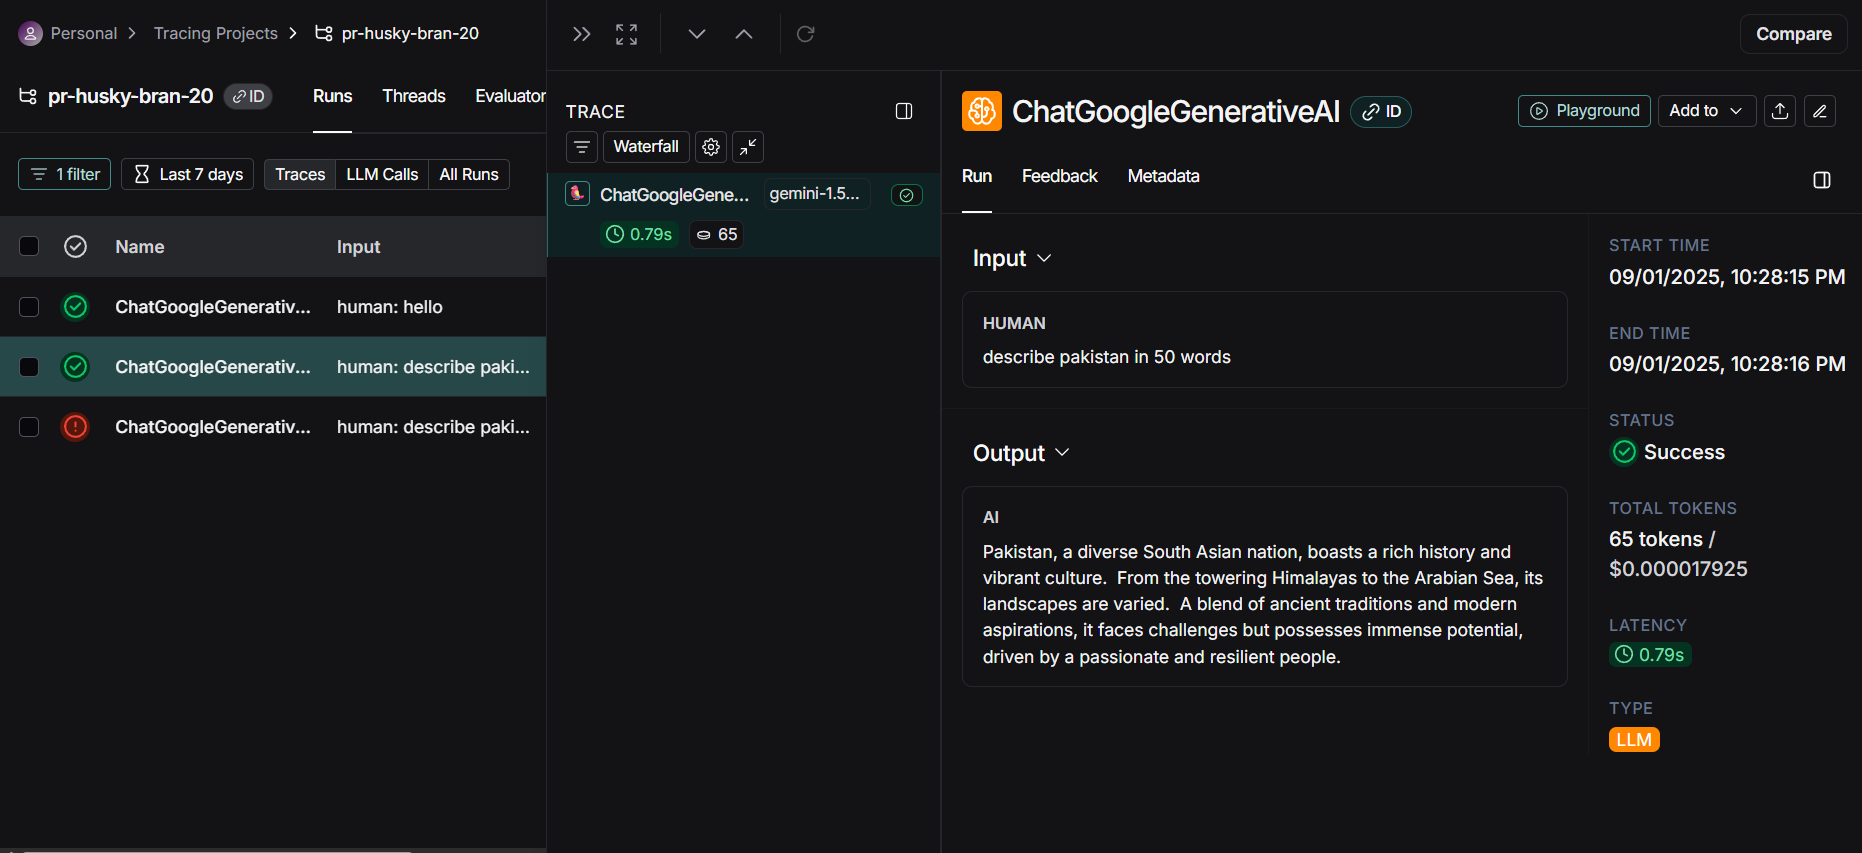

By default, LangSmith will capture plenty — however, it won't capture functions from outside of LangChain. Let's see how we can trace those.

## Tracing Non-LangChain Code

LangSmith can trace functions that are not part of LangChain, we just need to add the `@traceable` decorator. Let's try this for a few simple functions.

In [9]:
from langsmith import traceable
import random
import time


@traceable
def generate_random_number():
    return random.randint(0, 100)

@traceable
def generate_string_delay(input_str: str):
    number = random.randint(1, 5)
    time.sleep(number)
    return f"{input_str} ({number})"

@traceable
def random_error():
    number = random.randint(0, 1)
    if number == 0:
        raise ValueError("Random error")
    else:
        return "No error"

In [10]:
from tqdm.auto import tqdm

for _ in tqdm(range(10)):
    generate_random_number()
    generate_string_delay("Hello")
    try:
        random_error()
    except ValueError:
        pass

  0%|          | 0/10 [00:00<?, ?it/s]

Those traces should now be visible in the LangSmith UI, again under the same project:

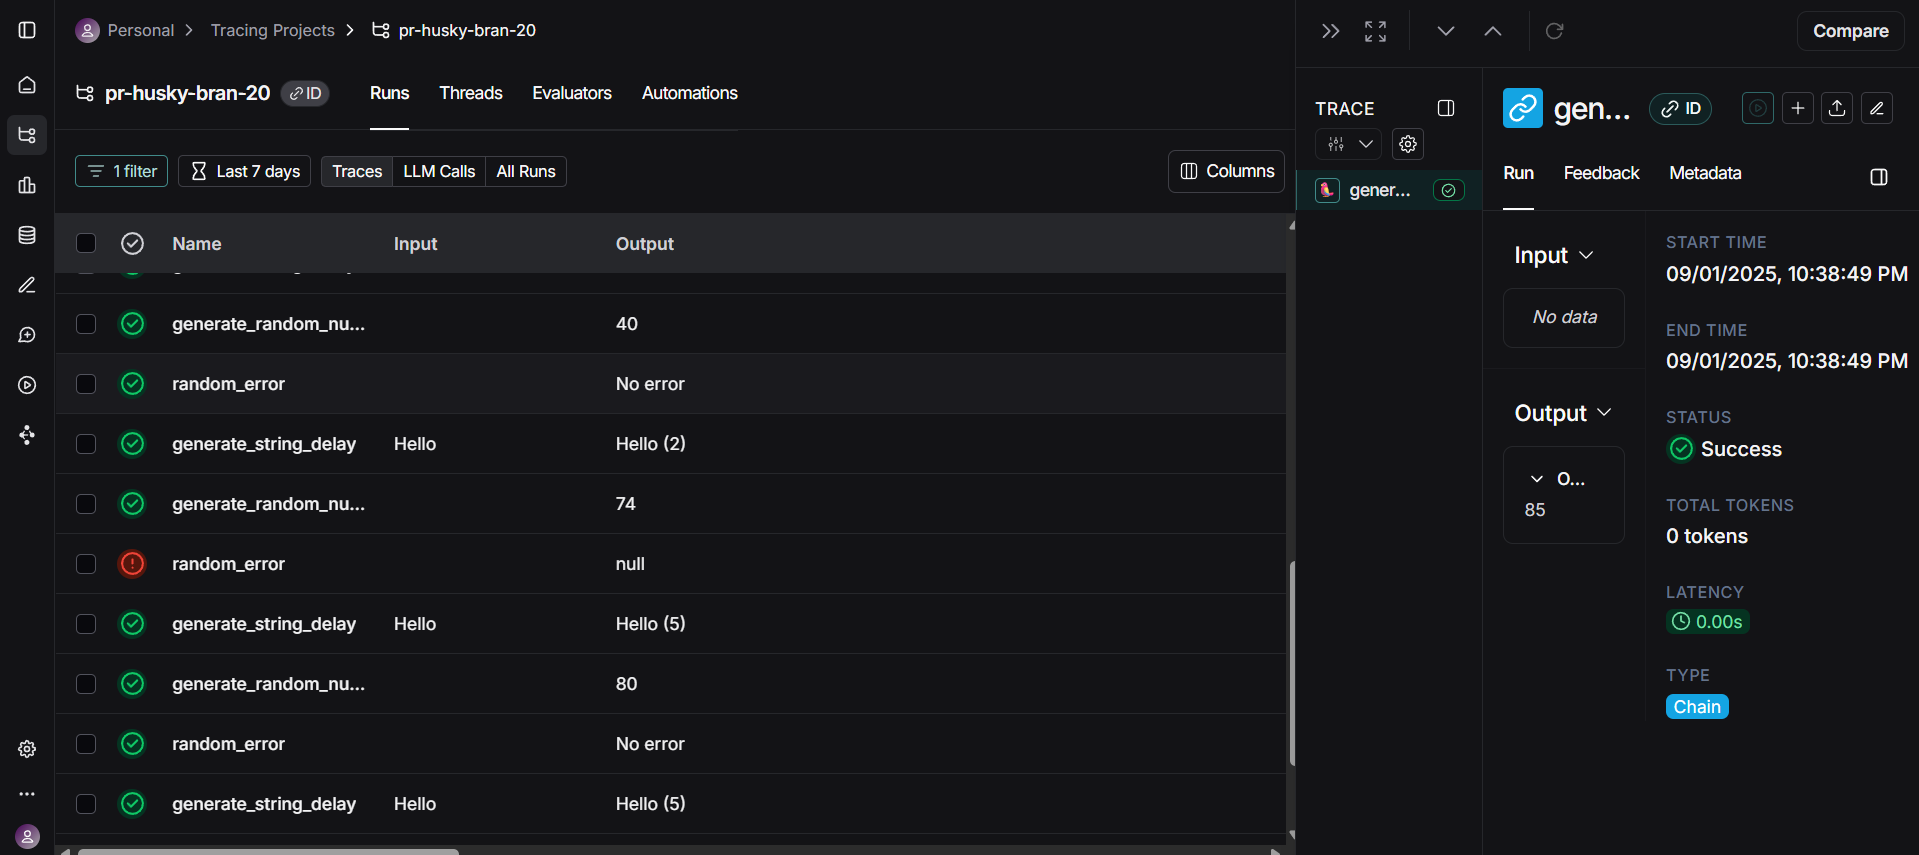

We can also give names to these function in Langsmith dashboard by including name="function_name" paramter in the @tracable
* Example :

In [ ]:
from langsmith import traceable

@traceable(name="Chitchat Maker")
def error_generation_function(question: str):
    delay = random.randint(0, 3)
    time.sleep(delay)
    number = random.randint(0, 1)
    if number == 0:
        raise ValueError("Random error")
    else:
        return "I'm great how are you?"